In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib notebook
plt.rcParams['figure.figsize'] = [8, 8] # to determine the size of the graphs

Given below are all of the dimensions we will be using
$$\mu_{(Sun, Jupiter)}= 7.1904e-4$$
Just one! Crazy isn't it?

Let us now write down the equations we will be using-
$$x''= 2y' + x - \frac{(1-\mu)(x+\mu)}{p_1^3} - \frac{\mu (x-1+\mu)}{p_2^3}$$
$$y'' = -2x' +y -\frac{(1-\mu)y}{p_1^3} - \frac{\mu y}{p_2^3}$$

Nomenclature I am following- I am designating a numpy array r[] to the position of the 3rd body (r[0]-x coordinate, r[1]- y coordinate) and v[] for the velocity of the 3rd body (v[0] and v[1] respectively do the same).

In [3]:
def dist1(position, mu):
    """
    Returns the distance of the 3rd body from the 1st mass
    """
    dist= (((position[0]+mu)**2)+((position[1])**2))**(0.5)
    #print(f"dist1= {dist}")
    return dist

def dist2(position, mu):
    """
    Returns the distance of the 3rd body from the 2nd mass
    """
    dist= (((position[0]+mu-1)**2)+((position[1])**2))**(0.5)
    #print(f"dist2= {dist}")
    return dist

def langrange_eqn(v, r, mu):
    """
    Solves the langrangian equations to return the acceleration based on the input velocity and positions 
    """
    p1=(dist1(r, mu))
    p2=(dist2(r, mu))
    
    acc_0= 2*v[1] + r[0] - (1-mu)*(r[0]+mu)/(p1**3) - mu * (r[0]-1+mu)/(p2**3)
    
    acc_1= -2*v[0] + r[1] - (1-mu)*r[1]/(p1**3) - mu* r[1]/(p2**3)
    
    
    return acc_0, acc_1

def euler_richard(v, r, time_period, mu):
    """
        This function has 2 arguments (v, r) which are all 2x1 numpy arrays, and 2 arguments (time_period, mu) which are constants
        It returns new velocity, new position using the euler-richardson method
    """
    acc_0, acc_1= np.array(langrange_eqn(v, r, mu))
    acceleration=np.array([acc_0, acc_1])
    #print(acceleration)
    
    v_mid=v+ acceleration*(time_period/2.0)
    #print(f"v_mid={v_mid}")
    
    r_mid= r+ v* (time_period/2.0)
    #print(f"r_mid={r_mid}")
    
    acc= np.array(langrange_eqn(v_mid, r_mid, mu))
    
    v_new= v + acc* (time_period)
    #print(f"v_new={v_new}")
    
    r_new = r + v_new* (time_period)
    #print(f"r_new={r_new}")
    return v_new, r_new

In [4]:
def calculate_trajectory(x_0, y_0, mu, time_period):
    """
    This function uses the Euler_richard function to make the trajectory of the positions based on the initial conditions given
    """
    #Now we will start off with a position and a velocity vector 1 cross 2
    r=np.array([[x_0, y_0]])#This is basically an array of arrays as we need to print the final graph using matplotlib
    v=np.array([0, 0])

    for i in range (0,100000):
        v_new, r_new= euler_richard(v, np.array(r[len(r)-1]), time_period, mu)
        v=np.array(v_new)
        r=np.r_[r, [np.array(r_new)]] #Update r with the new v
        #print(r)
        
    return r

Now that we have made all of the required functions, let us quasi-periodic orbits about $L_4$

In [9]:
mu=7.1904e-4
y_0= (3**0.5)/2+ 2*mu # a deviation of 5 mu from the Lagrange point
x_0= 0.5-mu + 2*mu # a deviation of 5 mu from the Lagrange point
time_period= 1.7634961439588688946015424164524e-8 *3* 60 * 60 * 24 #Basically 3 weeks considering the fact that we have scaled by 1/w

r_L4= calculate_trajectory(x_0, y_0, mu, time_period)

Now we will make a function "Plotter" to plot this r using Matplotlib

In [10]:
def Plotter(r, mu, label_):
    plt.figure()
    #ax = plt.axes()
    #ax.set_facecolor("black")
    plt.plot(r[:,0], r[:,1], 'teal')
    plt.title(label_)
    #sample_points=np.arange(0,100,1)
    #r_actual_x=1.5e11*np.cos(sample_points*2*np.pi/100)
    #r_actual_y=1.5e11*np.sin(sample_points*2*np.pi/100)

    #plt.plot(r_actual_x, r_actual_y, color='gold', label='Actual values')
    plt.plot(-mu, 0, marker="o", markersize=20, markeredgecolor="blue",markerfacecolor="lightgreen")
    plt.plot(1-mu, 0, marker="o", markersize=10, markeredgecolor="black",markerfacecolor="silver")
    plt.plot(0.5 - mu, (3**0.5)/2, marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")
    plt.plot(0.5 - mu, -(3**0.5)/2, marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")
    #plt.ylim(y0+mu, y0-mu) # to ensure that the plot is perfectly zoomed in
    #plt.xlim(0.5-2*mu, 0.5) #Again the same but with even worse math
    plt.xlabel("x axis")
    plt.ylabel("y axis")

    plt.legend()

    plt.show()

<IPython.core.display.Javascript object>


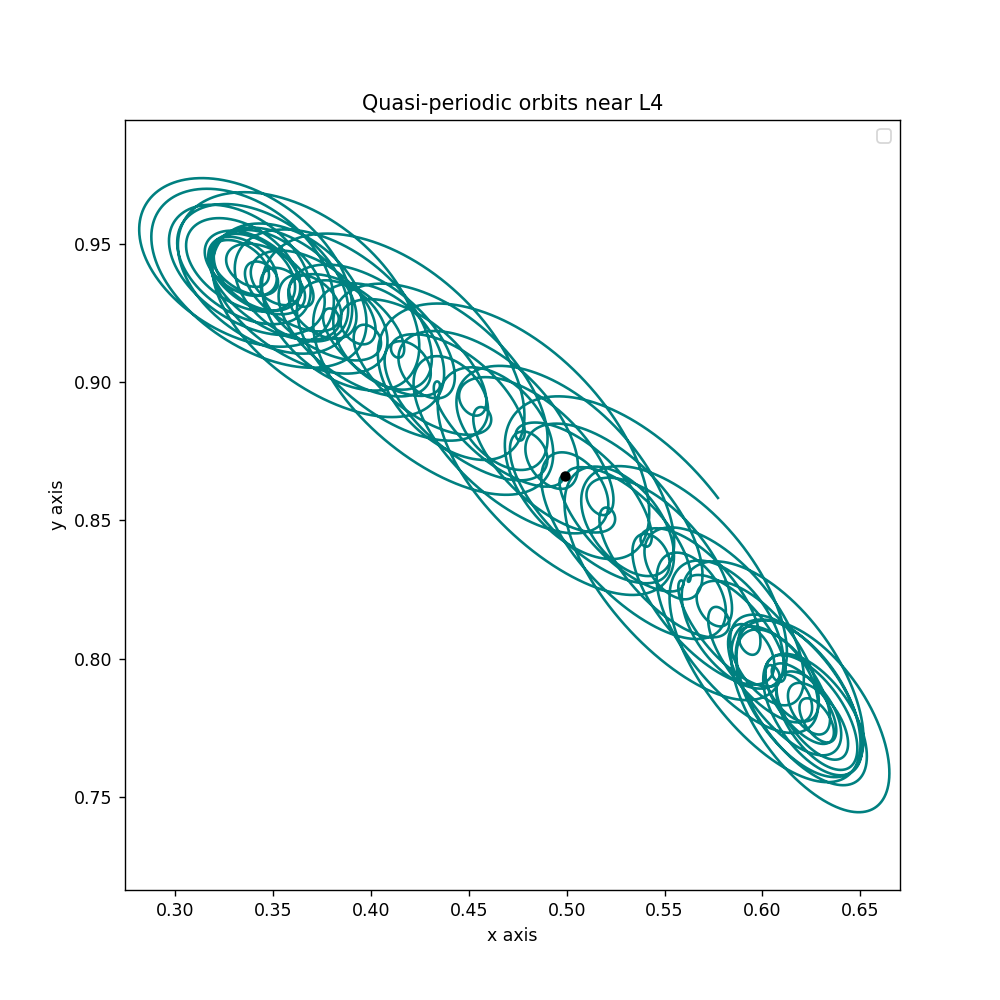

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [11]:
Plotter(r_L4, mu, 'Quasi-periodic orbits near L4')

### Where are the Lagrange Points Exactly?


<IPython.core.display.Javascript object>


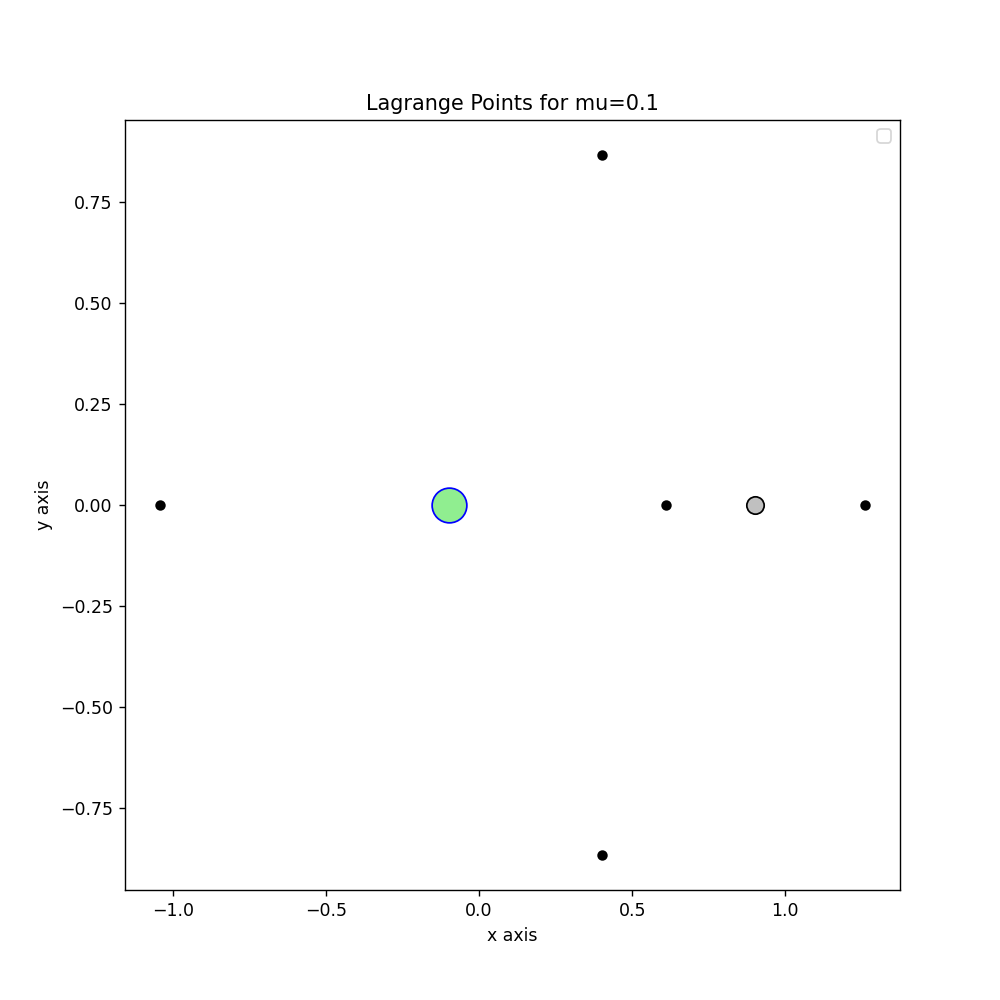

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [7]:
plt.figure()
plt.plot(-0.1, 0, marker="o", markersize=20, markeredgecolor="blue",markerfacecolor="lightgreen")
plt.plot(0.9, 0, marker="o", markersize=10, markeredgecolor="black",markerfacecolor="silver")
plt.plot(0.4, (3**0.5)/2, marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")
plt.plot(0.4, -(3**0.5)/2, marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")
plt.plot(-1.04161, 0, marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")
plt.plot(0.60903, 0, marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")
plt.plot(1.2597, 0, marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")
plt.title("Lagrange Points for mu=0.1")
plt.xlabel("x axis")
plt.ylabel("y axis")

plt.legend()

plt.show()

## Poincare Sections
In order to construct the Poincare sections, we will just look at all the points with v[1]=0 and v[0]>0

<IPython.core.display.Javascript object>


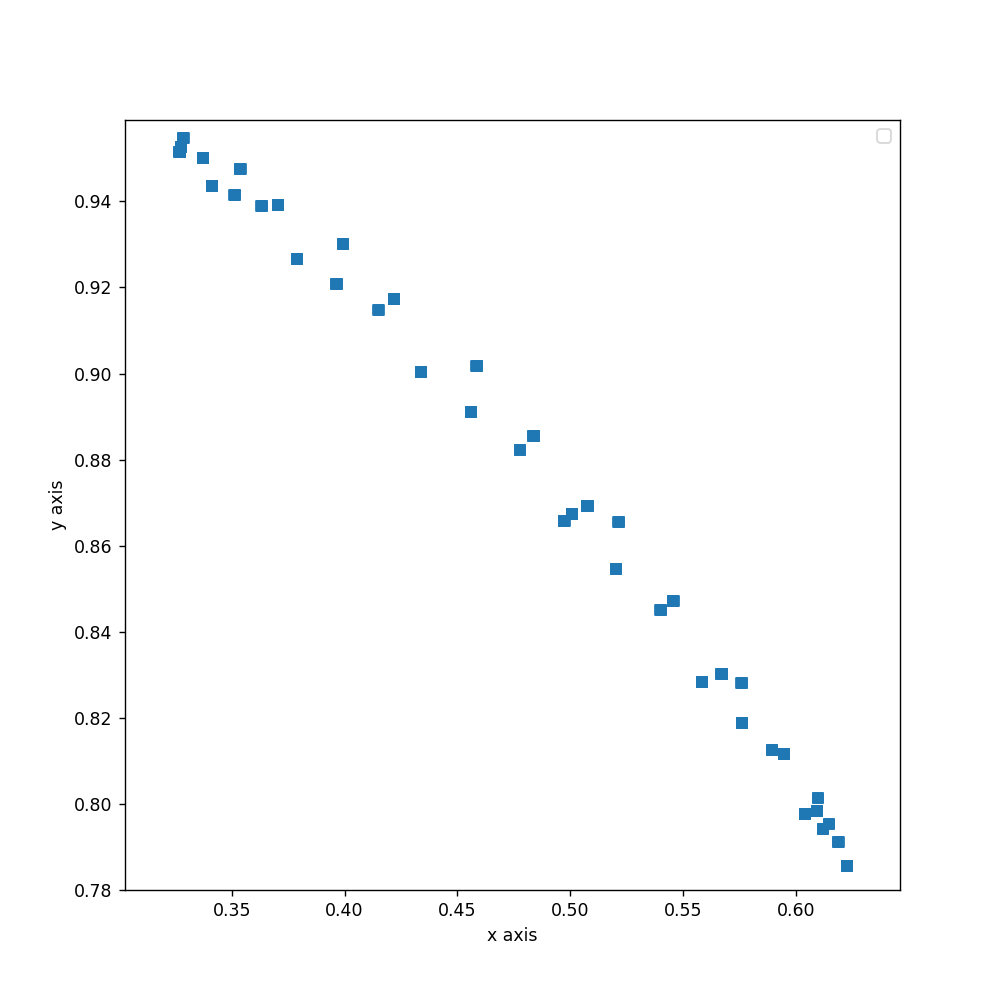

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [12]:
def Poincare(x_0, y_0, mu, time_period):
    """
    This function uses the Euler_richard function to make the trajectory of the positions based on the initial conditions given
    """
    #Now we will start off with a position and a velocity vector 1 cross 2
    r=np.array([[x_0, y_0]])#This is basically an array of arrays as we need to print the final graph using matplotlib
    v=np.array([0, 0])
    r_output=np.array([[x_0, y_0]])

    for i in range (0,52000):
        v_new, r_new= euler_richard(v, np.array(r[len(r)-1]), time_period, mu)
        v=np.array(v_new)
        r=np.r_[r, [np.array(r_new)]] #Update r with the new v
        if v[1]<0.0001 and v[1]>-0.0001 and v[0]>0:
            r_output=np.r_[r_output, [np.array(r_new)]]
        #print(r)
        
    return r_output

r4Poincare=Poincare(x_0, y_0 , mu, time_period)
plt.figure()
plt.scatter(r4Poincare[:,0], r4Poincare[:,1], marker=",")
plt.plot(-mu, 0, marker="o", markersize=20, markeredgecolor="blue",markerfacecolor="lightgreen")
plt.plot(1-mu, 0, marker="o", markersize=10, markeredgecolor="black",markerfacecolor="silver")
#plt.ylim(y0+mu, y0-mu) # to ensure that the plot is perfectly zoomed in
plt.ylim(0.7, 0.98) #Again the same but with even worse math
plt.xlabel("x axis")
plt.ylabel("y axis")

plt.legend()

plt.show()

In [9]:
x_1=x_0
y_1=y_0-7.19/1e4
r=calculate_trajectory(x_1,y_1, mu, time_period)
Plotter(r,mu, 'Point perturbed from L4')

<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


We have gotten a big change in our trajectory suddenly with such a minute change in initial y. Now let us animate the same

Now let us try to plot the quasi-periodic orbits around L4 by plotting the orbits of all the small perturbations

In [ ]:
x_1=x_0
y_1=y_0-mu
r1=calculate_trajectory(x_1,y_1, mu, time_period)
r2=calculate_trajectory(x_1+4*mu, y_1, mu, time_period)
r3=calculate_trajectory(x_1-7*mu, y_1+8*mu, mu, time_period)
r4=calculate_trajectory(x_1-2*mu, y_1+2*mu, mu, time_period)
r5=calculate_trajectory(x_1-5*mu, y_1+2*mu, mu, time_period)
r6=calculate_trajectory(x_1-2*mu, y_1+6*mu, mu, time_period)
r7=calculate_trajectory(x_1-7*mu, y_1+2*mu, mu, time_period)
r8=calculate_trajectory(x_1-5*mu, y_1+5*mu, mu, time_period)
plt.figure()
#ax = plt.axes()
#ax.set_facecolor("white")
plt.plot(r1[:,0], r1[:,1], 'red', label="x_0+4mu, y_0-mu")
plt.plot(r2[:,0], r2[:,1], 'blue', label="x_0-mu, y_0-mu")
plt.plot(r3[:,0], r3[:,1], 'green', label="x_0-mu, y_0")
plt.plot(r4[:,0], r4[:,1], 'brown', label="x_0-2*mu, y_0+mu")
plt.plot(r5[:,0], r5[:,1], 'pink', label="x_0-2*mu, y_0+mu")
plt.plot(r6[:,0], r6[:,1], 'purple', label="x_0-2*mu, y_0+mu")
plt.plot(r7[:,0], r7[:,1], 'gold', label="x_0-2*mu, y_0+mu")
plt.plot(r8[:,0], r8[:,1], 'gray', label="x_0-2*mu, y_0+mu")
#sample_points=np.arange(0,100,1)
#r_actual_x=1.5e11*np.cos(sample_points*2*np.pi/100)
#r_actual_y=1.5e11*np.sin(sample_points*2*np.pi/100)

#plt.plot(r_actual_x, r_actual_y, color='gold', label='Actual values')
plt.plot(-mu, 0, marker="o", markersize=20, markeredgecolor="blue",markerfacecolor="lightgreen")
plt.plot(1-mu, 0, marker="o", markersize=10, markeredgecolor="black",markerfacecolor="silver")
#plt.ylim(y0+mu, y0-mu) # to ensure that the plot is perfectly zoomed in
#plt.xlim(0.5-2*mu, 0.5) #Again the same but with even worse math
plt.xlabel("x axis")
plt.ylabel("y axis")

plt.legend()

plt.show()

Now let us try to find the poincare curves for one of the above curves i.e. $y'=0$ and $x'>0$

I can't figure out how to make the plots discrete so I am keeping this to the side for now